# CSCI 285 Lab 1 
Written by: Lab Partner #1 and Lab Partner #2

## Dataset Explanation
This [data set](https://alaska.usgs.gov/products/data.php?dataid=306) documents the width of annual otolith growth increments from Lake Trout collected in lakes within Lake Clark National Park and Preserve, Alaska. The analysis of this data was published in von Biela et al. 2020 (DOI: 10.1111/eff.12566)

Author(s): von Biela, V. R.; Black, B. A.; van der Sleen, P.


| Feature | Type | Description |
|:--------------|:--------------|:-----------|
| FishID     | string| a unique identifier assigned to each fish | 
| ReplicateID| string| a unique identifier assigned to each replicate measuremnet transect| 
| Axis       | string| the axis along which measurements are made. Axis can either be `'S'` or `'L'`.| 
| Lake       | string| where the fish was captured.| 
| Year       | int   | the year when the growth increment was formed. Year is in the range `[1979, 2012]`.| 
| Age        | int   | the age of the individual fish in years. Age is in the range `[1, 29]`.| 
| Width      | float | the width of the annual growth increments in millimeters. Width is in the range `[0.013, 0.186]`|


### Data Quality
The only known omissions from this report were the 171 of 251 total lake trout caught that were not included because they had otolith growth increments that were not clear enough for growth measurements.


In [1]:
import pandas as pd

## Understanding the data

In [5]:
df = pd.read_csv('../data/lakeTrout.csv')

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.shape

(2403, 7)

In [8]:
df.head()

,FishID,ReplicateID,Axis,Lake,Year,Age,Width
0,LLC_LT028,LT028A,S,Little Lake Clark,1987,4,0.048
1,LLC_LT028,LT028A,S,Little Lake Clark,1988,5,0.038
2,LLC_LT028,LT028A,S,Little Lake Clark,1989,6,0.046
3,LLC_LT028,LT028A,S,Little Lake Clark,1990,7,0.037
4,LLC_LT028,LT028A,S,Little Lake Clark,1991,8,0.040


<br />
To convert the column names to lowercase, a list comprehension can be used to apply the `str.lower()` method to all the column names:

In [9]:
df.columns = [x.lower() for x in df.columns]
df.columns

Index(['fishid', 'replicateid', 'axis', 'lake', 'year', 'age', 'width'], dtype='object')

<br />
The number of distinct fish can be obtained by using `nunqiue()` on the `fishid` column. Each row in the data set corresponds to a measurement - not a fish. So one fish may show up more than once in the data. 

In [10]:
df['fishid'].nunique()

80

<br />
There seems to be 4 duplicated rows of data. One explanation for this is an error on the part of the person entering the data. Since the rows are adjacent, perhaps this was overlooked. Recording fish measurements while handling fish sounds like a dirty job!

In [11]:
df[ df.duplicated(keep=False) ]

,fishid,replicateid,axis,lake,year,age,width
1198,LT0126,LT126.2B,S,Lake Clark,2006,10,0.028
1199,LT0126,LT126.2B,S,Lake Clark,2006,10,0.028
1204,LT0126,LT126.2B,S,Lake Clark,2009,13,0.035
1205,LT0126,LT126.2B,S,Lake Clark,2009,13,0.035
2001,LT0223,LT223.2A,S,Lachbuna,2005,13,0.046
2002,LT0223,LT223.2A,S,Lachbuna,2005,13,0.046
2005,LT0223,LT223.2A,S,Lachbuna,2007,15,0.038
2006,LT0223,LT223.2A,S,Lachbuna,2007,15,0.038


### Dropping Duplicates
For our analysis, we want to drop any duplicate rows that seem to stem from data entry errors. 

In [12]:
df = df.drop_duplicates()

### Descriptive Statistics
Let's perform some common descriptive statistics on the data. 

In [13]:
df.describe()

,year,age,width
count,2399.000000,2399.000000,2399.000000
mean,2001.581492,10.235932,0.042745
std,5.834735,4.619846,0.020507
min,1979.000000,1.000000,0.013000
25%,1998.000000,7.000000,0.028000
50%,2002.000000,10.000000,0.038000
75%,2006.000000,13.000000,0.052000
max,2012.000000,29.000000,0.186000


<br />
There are other methods available that extract smaller pieces of the above data, such as `.min()` and `.max()`:

In [14]:
df['age'].min()

1

In [15]:
df['age'].max()

29

<br />
To visually present a range of data, such as that in the `'year'` column, multiple approaches can be taken:

* The `.value_counts()` method creates a series of all included years indexing the number of times they appear.
* The `.hist()` method creates a histogram graphic of the data.

In [16]:
df['year'].value_counts()

2001    173
2002    165
2000    160
1999    142
2006    138
2007    138
2008    137
2005    136
2003    135
2004    131
1998    126
2009    126
1997    100
1996     89
2010     83
1995     68
2011     60
1994     57
1993     48
1992     39
1991     32
1990     26
1989     19
1988     15
2012     13
1987     12
1986      8
1985      4
1984      4
1983      4
1982      4
1981      3
1980      2
1979      2
Name: year, dtype: int64

<AxesSubplot:>

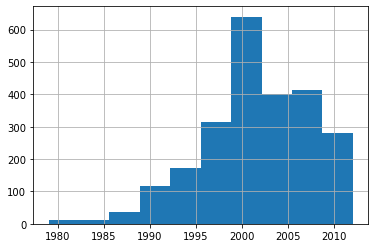

In [17]:
df['year'].hist()

The difference between `.value_counts()` and `.hist()` is that `.value_counts()` gives you a table of each year and how many entries were in that year, whereas `.hist()` gives a graph that visually shows the range of entries. In `.hist()`, it is less percise because we cannot tell the exact range of the entries, but it is easier for humans to analyze.

Here are histograms of the `'age'` and `'width'` columns:

<AxesSubplot:>

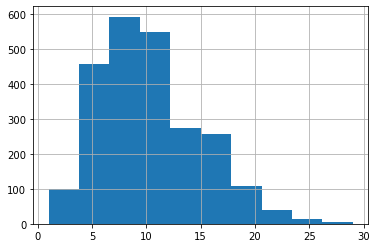

In [18]:
df['age'].hist()

<AxesSubplot:>

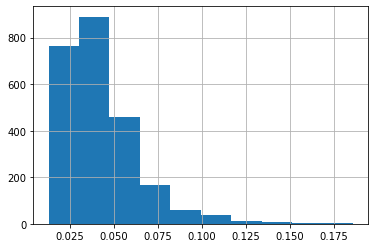

In [19]:
df['width'].hist()

`.value_counts()` is more useful on categorical data, especially when there are very few categories. For example, here are the value counts for the `'lake'` column:

In [20]:
df['lake'].value_counts()

Telaquana            431
Kontrashibuna        409
Portage              373
Fishtrap             358
Lake Clark           329
Lachbuna             197
Little Lake Clark    161
Kijik                141
Name: lake, dtype: int64

## Aggregating the data
Let's see how many fish were studied per lake. We know there were 80 fish studied overall, but having a breakdown per lake will help us get a better sense of this distrubution. In this case, there are only two columns, `'fishid'` and `'lake'`.

In [21]:
new_df = df[['fishid', 'lake']].drop_duplicates()
new_df

,fishid,lake
0,LLC_LT028,Little Lake Clark
44,LLC_LT033,Little Lake Clark
79,LLC_LT036,Little Lake Clark
99,LLC_LT039,Little Lake Clark
122,LLC_LT040,Little Lake Clark
...,...,...
2160,LT0233,Portage
2205,LT0235,Portage
2260,LT0238,Portage
2320,LT0245,Portage


Now, the multiple rows of data are too much, the only thing that matters is getting the amount of fish in a specific lake. By using `.groupby('lake').count()`, it is now able to group by the amount of unique fish in the data by each lake.

In [22]:
agg = new_df.groupby('lake').count()
agg.columns = ['fish_count']
agg

,fish_count
lake,
Fishtrap,9
Kijik,7
Kontrashibuna,15
Lachbuna,10
Lake Clark,9
Little Lake Clark,6
Portage,9
Telaquana,15


Write out these results to a CSV:

In [23]:
agg.to_csv('lake.csv')

## Step 3
Performing this in vanilla Python would be a challenging task for anyone. For example, the code below performs a function similar to `df['lake'].value_counts()`:

In [24]:
import csv
fish_counts = dict()
with open('trout.csv', newline='') as csvfile:
    file_reader = csv.reader(csvfile, delimiter=',')
    next(file_reader)

    lake_index = 3
    fish_counts = {
        'Telaquana': 0,
        'Kontrashibuna': 0,
        'Portage': 0,
        'Fishtrap': 0,
        'Lake Clark': 0,
        'Lachbuna': 0,
        'Little Lake Clark': 0,
        'Kijik': 0
    }
    
    for row in file_reader:
        fish_counts[row[lake_index]] += 1
    
print(fish_counts)

FileNotFoundError: [Errno 2] No such file or directory: 'trout.csv'

<br />
Comparing results to what we get with pandas to confirm the code is correct. 

In [25]:
df['lake'].value_counts()

Telaquana            431
Kontrashibuna        409
Portage              373
Fishtrap             358
Lake Clark           329
Lachbuna             197
Little Lake Clark    161
Kijik                141
Name: lake, dtype: int64

## Conclusion

`pandas` is a powerful tool for reading, writing, storing, manipulating, and analyzing data. Starting from raw USGS field data and a data dictionary, it only took a few steps to find the number of fish in each lake and store it in a new CSV file.